# Problem
- Our paid advertising team wants to build a new advertising campaign featuring our best products, but don’t know which products would be most effective to highlight. Using a few basic datasets about our website’s traffic and product order history, what products or manufacturers should we start with?


# Questions to think about
- What products or brands would be most effective to highlight in an ad campaign, and why?
- What other types of datasets would you want to incorporate in to improve this analysis?
- How would you measure the success of this campaign and improve it moving forward?
- How would you scale up your work to automate this process in the future?

## What products or brands would be most effective to highlight in an ad campaign, and why?

**1. Data preprocessing and cleaning**
   - 1.1 Handle missing values and duplicates
   
**2. Exploring the content of variables**
   - 2.1 product 
       * 2.1.1 Top products in each measurement(total orders, total units, total buyers, total sales)
       * 2.1.2 Top brands in each measurement
   - 2.2 event
       * 2.2.1 Insight on categorical features(event_type, month)

**3. Data manipulation**

   - 3.1 Extract product id from event table and get data from Q1 2019
   - 3.2 Merger event and product data using product id and group products

**4. Exploratory data analysis and find the most effective brands and products**

   - 4.1 Define metrics we choose and calculations
       * 4.1.1 Total traffic(total event, total orders, total units, total buyers, total sales)
       * 4.1.2 Conversion rate
       * 4.1.3 Revenue per visitor (RPV) 
   - 4.2 Define the most 'effective' products and brands
       * 4.2.1 Top products and brands measured by single metric.
       * 4.2.2 Top products and brands measured by conversion rate or RPV with a threshold on total order
       * 4.2.3 Top products and brands measured by total order with a threshold on conversion

**5. Result and my recommandations**

### Import packages

In [50]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
# import plotly.offline as py#visualization
# py.init_notebook_mode(connected=True)#visualization
# import plotly.graph_objs as go#visualization
# import plotly.tools as tls#visualization
# import plotly.figure_factory as ff#visualization
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
# sns.distplot(churn_df['total_intl_charge'])
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
pd.set_option('display.max_columns', None)

### Reading datasets

In [51]:
event = pd.read_csv("assessment_event_data.csv")
product =pd.read_csv("assessment_product_data.csv")

In [52]:
event.head()

,month,event_type,url,total_events,users
0,2019-04-01,page_view,/recipes/78276-the-nordic-baking-book-s-kladdkaka-swedish-gooey-chocolate-cake,10957,9577
1,2019-06-01,page_view,/recipes/11586-marinated-and-grilled-baby-octopus,806,696
2,2019-01-01,page_view,/recipes/77128-nori-sesame-avocado-toast,1150,982
3,2019-02-01,page_view,/recipes/39331-mushrooms-with-caramelized-shallots-fresh-thyme,375,282
4,2019-04-01,page_view,/recipes/76393-cauliflower-crust-quiche,93,77


In [53]:
product.head()

,product_id,product_name,brand_name,total_orders,total_units,total_buyers,total_sales
0,39,PieBox,PieBox,43,45,42,1921
1,49,Jacobsen Salt Co. Slide Tin (4 pack),Jacobsen Salt Co.,9,10,9,239
2,53,"N. 19 - Salvador (Pimenton, Saffron, Seafood Essence)",La Boîte,1,1,1,27
3,54,"N. 25 - Escabeche (Lemon, Saffron, Coriander, Fennel)",La Boîte,17,17,17,395
4,56,"N. 11 - Cancale (Fleur de sel, Orange, Fennel)",La Boîte,18,18,17,440


## **1. Data preprocessing and cleaning**
   - 1.1 Handle missing values and duplicates

Check data information

In [54]:
print("event_info     : \n", event.info())
print("product_info     : \n", product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112634 entries, 0 to 1112633
Data columns (total 5 columns):
month           1112634 non-null object
event_type      1112634 non-null object
url             1112632 non-null object
total_events    1112634 non-null int64
users           1112634 non-null int64
dtypes: int64(2), object(3)
memory usage: 42.4+ MB
event_info     : 
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3033 entries, 0 to 3032
Data columns (total 7 columns):
product_id      3033 non-null int64
product_name    3033 non-null object
brand_name      3033 non-null object
total_orders    3033 non-null int64
total_units     3033 non-null int64
total_buyers    3033 non-null int64
total_sales     3033 non-null int64
dtypes: int64(5), object(2)
memory usage: 165.9+ KB
product_info     : 
 None


In [55]:
for i in event, product:
    print ("Rows     : " ,i.shape[0])
    print ("Columns  : " ,i.shape[1])
    print ("\nFeatures : \n" ,i.columns.tolist())
    print ("\nMissing values :  ",i.isnull().sum())
    print ("\nDuplicated values :  ",i.duplicated().sum())
    print ("\nUnique values :  \n",i.nunique())

Rows     :  1112634
Columns  :  5

Features : 
 ['month', 'event_type', 'url', 'total_events', 'users']

Missing values :   month           0
event_type      0
url             2
total_events    0
users           0
dtype: int64

Duplicated values :   0

Unique values :  
 month                7
event_type           2
url             396547
total_events      5559
users             4993
dtype: int64
Rows     :  3033
Columns  :  7

Features : 
 ['product_id', 'product_name', 'brand_name', 'total_orders', 'total_units', 'total_buyers', 'total_sales']

Missing values :   product_id      0
product_name    0
brand_name      0
total_orders    0
total_units     0
total_buyers    0
total_sales     0
dtype: int64

Duplicated values :   273

Unique values :  
 product_id      2760
product_name    2751
brand_name       433
total_orders     208
total_units      236
total_buyers     203
total_sales     1284
dtype: int64


### 2 missing values in url in event table and there are 273 duplicated values in product table. Drop them for data cleaning. 

In [56]:
print ("other duplicats: ")
event=event.dropna()
product=product.drop_duplicates()
product.duplicated('product_id').sum()  

other duplicats: 


0

In [57]:
print ("Cleaned data     :\n ")
product.info()

Cleaned data     :
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2760 entries, 0 to 3032
Data columns (total 7 columns):
product_id      2760 non-null int64
product_name    2760 non-null object
brand_name      2760 non-null object
total_orders    2760 non-null int64
total_units     2760 non-null int64
total_buyers    2760 non-null int64
total_sales     2760 non-null int64
dtypes: int64(5), object(2)
memory usage: 172.5+ KB


In [58]:
event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1112632 entries, 0 to 1112633
Data columns (total 5 columns):
month           1112632 non-null object
event_type      1112632 non-null object
url             1112632 non-null object
total_events    1112632 non-null int64
users           1112632 non-null int64
dtypes: int64(2), object(3)
memory usage: 50.9+ MB


## **2. Exploring the content of variables**
   - 2.1 product data
       * 2.1.1 Top products in each measurement(total orders, total units, total buyers, total sales)
       * 2.1.2 Top brands in each measurement
   - 2.2 event data
       * 2.2.1 Insight on categorical features(event_type, month)

### Top 5 products in total_orders, total_units, total_buyers, total_sales

In [59]:
for i in ['total_orders','total_units','total_buyers','total_sales']:
    print('\nTop 5 products in {}\n'.format(i))
    a=product.sort_values(by=i, ascending=False)  
    print(a.head().product_name)


Top 5 products in total_orders

2426    Food52 x GreenPan Nonstick Skillet (Set of 2)
1021                           Wood-Handled Dish Rack
1624                         Stackable Bodega Glasses
2945                           Five Two Wooden Spoons
2046                    Lovely Baking Rolling Pin Set
Name: product_name, dtype: object

Top 5 products in total_units

2426    Food52 x GreenPan Nonstick Skillet (Set of 2)
1021                           Wood-Handled Dish Rack
1624                         Stackable Bodega Glasses
2945                           Five Two Wooden Spoons
2046                    Lovely Baking Rolling Pin Set
Name: product_name, dtype: object

Top 5 products in total_buyers

2426    Food52 x GreenPan Nonstick Skillet (Set of 2)
1021                           Wood-Handled Dish Rack
1624                         Stackable Bodega Glasses
2945                           Five Two Wooden Spoons
2046                    Lovely Baking Rolling Pin Set
Name: product_name, dtyp

## Top 5 products with Food52 in product_name
There are product names include Food52. It maybe some product we 'd like to advertise

In [60]:
pd.set_option('max_colwidth',100)
for i in ['total_orders','total_units','total_buyers','total_sales']:
    print('\nTop 5 Food52 products in {}\n'.format(i))
    a=product.loc[product['product_name'].str.contains('Food52')]
    b=a.sort_values(by=i, ascending=False)
    print(b.head().product_name)


Top 5 Food52 products in total_orders

2426                   Food52 x GreenPan Nonstick Skillet (Set of 2)
1972         Food52 x Ekobo Recycled Bamboo Colander & Pour Bowl Set
2000          Food52 x Staub Multi-Use Braiser with Glass Lid, 3.5QT
1735    Food52 x Farmhouse Pottery Double Oven Mitt & Apron Gift Set
2179                       Food52 x Staub 2-in-1 Grill Pan & Cocotte
Name: product_name, dtype: object

Top 5 Food52 products in total_units

2426                   Food52 x GreenPan Nonstick Skillet (Set of 2)
1972         Food52 x Ekobo Recycled Bamboo Colander & Pour Bowl Set
2000          Food52 x Staub Multi-Use Braiser with Glass Lid, 3.5QT
1735    Food52 x Farmhouse Pottery Double Oven Mitt & Apron Gift Set
1418                              Food52 x Dansk Kobenstyle Saucepan
Name: product_name, dtype: object

Top 5 Food52 products in total_buyers

2426                   Food52 x GreenPan Nonstick Skillet (Set of 2)
1972         Food52 x Ekobo Recycled Bamboo Colander &

## Top 5 Brands in total_orders, total_units, total_buyers, total_sales

In [61]:
#top vendors
for i in ['total_orders','total_units','total_buyers','total_sales']:
    print('\nTop 5 Brand in {}\n'.format(i))
    c=vendor_rank=product.groupby('brand_name')['total_orders','total_units','total_buyers','total_sales'].sum().sort_values(by='total_sales',ascending=False).reset_index()
    print(c.head().brand_name)


Top 5 Brand in total_orders

0    ZWILLING J.A. Henckels
1                  GreenPan
2             Yamazaki Home
3          Hawkins New York
4         Farmhouse Pottery
Name: brand_name, dtype: object

Top 5 Brand in total_units

0    ZWILLING J.A. Henckels
1                  GreenPan
2             Yamazaki Home
3          Hawkins New York
4         Farmhouse Pottery
Name: brand_name, dtype: object

Top 5 Brand in total_buyers

0    ZWILLING J.A. Henckels
1                  GreenPan
2             Yamazaki Home
3          Hawkins New York
4         Farmhouse Pottery
Name: brand_name, dtype: object

Top 5 Brand in total_sales

0    ZWILLING J.A. Henckels
1                  GreenPan
2             Yamazaki Home
3          Hawkins New York
4         Farmhouse Pottery
Name: brand_name, dtype: object


## Understanding categorical information in event data

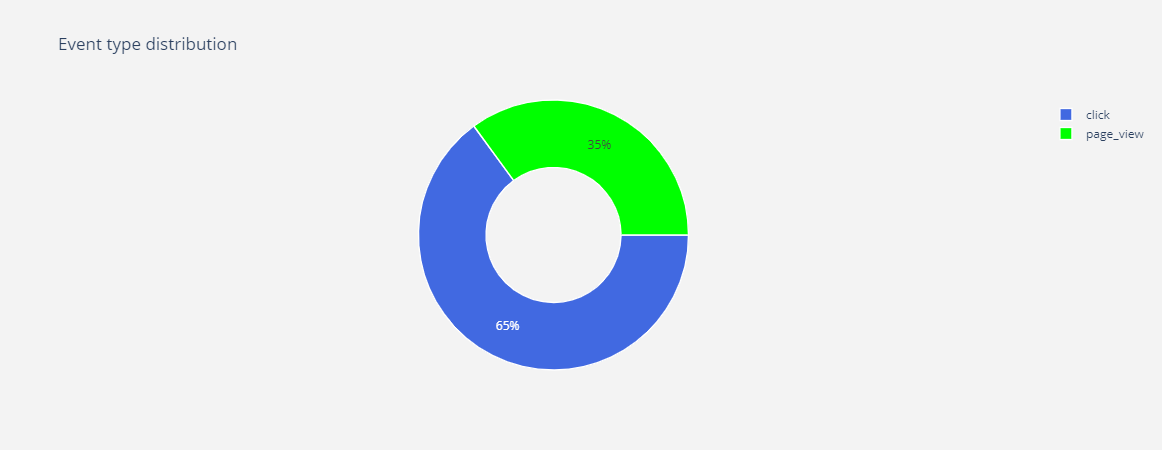

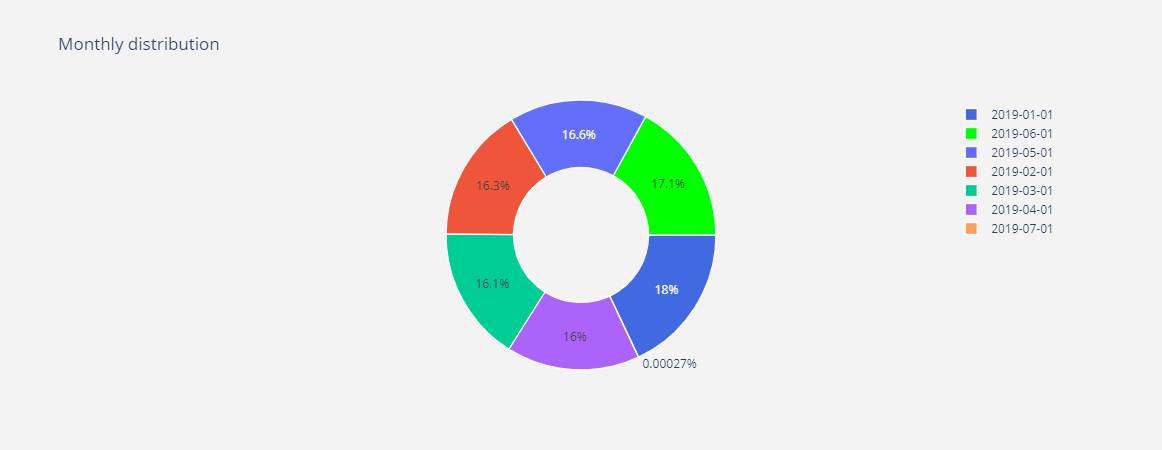

In [62]:
#labels
lab = event["event_type"].value_counts().keys().tolist()
#values
val = event["event_type"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Event type distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)
#labels
lab = event["month"].value_counts().keys().tolist()
#values
val = event["month"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Monthly distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## 3. Data Mulnipulation
To calculate some metrics such as conversion rate, we need to use the information from all the datasets.

### The url contains product_id so we can extract the product_id as the key and join two tables together.

In [63]:
event['product_id']=event['url'].str.extract(".*/products/(\d+)", expand=False)
event_pid=event.dropna()
event_pid.head()

,month,event_type,url,total_events,users,product_id
5,2019-01-01,page_view,/shop/products/3584-emile-henry-ceramic-tagine,144,131,3584
6,2019-04-01,page_view,/shop/products/4802-perfect-cookie-nonstick-baking-mat-set-of-2,271,227,4802
9,2019-06-01,page_view,/shop/products/3045-mason-cash-forest-mixing-bowls,1846,1344,3045
16,2019-06-01,page_view,/shop/products/39-piebox,869,749,39
19,2019-01-01,page_view,/shop/products/4126-signed-copy-food52-any-night-grilling,180,167,4126


In [64]:
print('Any duplicates')
event_pid.duplicated().sum()

Any duplicates


0

In [65]:
print('info')
event_pid.info()

info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 130001 entries, 5 to 1112628
Data columns (total 6 columns):
month           130001 non-null object
event_type      130001 non-null object
url             130001 non-null object
total_events    130001 non-null int64
users           130001 non-null int64
product_id      130001 non-null object
dtypes: int64(2), object(4)
memory usage: 6.9+ MB


### The product data is from Q1 2019, so the event data should be in the same time period.

In [66]:
event_13=event_pid[(event_pid.month=='2019-01-01')|(event_pid.month=='2019-02-01')|(event_pid.month=='2019-03-01')]
event_13[["product_id"]] = event_13[["product_id"]].astype(int)
df = product.merge(event_13, on=['product_id'], how='inner').sort_values(by='product_id',ascending=True)

In [67]:
df.head()

,product_id,product_name,brand_name,total_orders,total_units,total_buyers,total_sales,month,event_type,url,total_events,users
0,39,PieBox,PieBox,43,45,42,1921,2019-03-01,page_view,/shop/products/39-piebox,670,569
32,39,PieBox,PieBox,43,45,42,1921,2019-03-01,click,/shop/products/39-piebox?sku=1357&gclid=eaiaiqobchmi24g9god94aivklbach2btw-jeaqyaiabegjybvd_bwe&...,1,1
31,39,PieBox,PieBox,43,45,42,1921,2019-01-01,click,/shop/products/39-piebox?sku=1357&gclid=eaiaiqobchmivkfc39h_3wiv3rfach2ffqhyeaqyasabegkotpd_bwe&...,1,1
30,39,PieBox,PieBox,43,45,42,1921,2019-03-01,click,/shop/products/39-piebox?sku=1357&gclid=eaiaiqobchmi47y52pig4qivdrnach06xg8_eaqybsabegiw4fd_bwe&...,2,1
29,39,PieBox,PieBox,43,45,42,1921,2019-01-01,click,/shop/products/39-piebox?sku=1357,1,1


Glance at the categorical feature


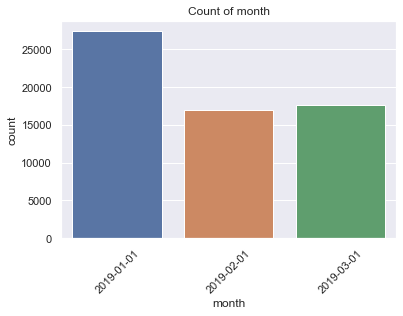

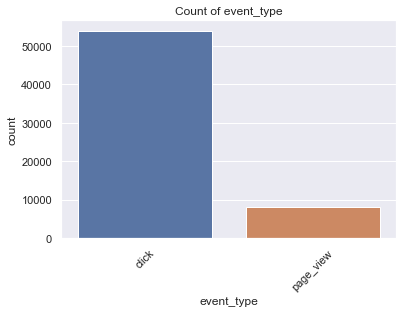

In [68]:
print('Glance at the categorical feature')
for i in ['month', 'event_type']:
    sns.set(style="darkgrid")
    sns.countplot(x=i, data=df,order=np.sort(df[i].unique()))
    plt.xticks(rotation=45)
    plt.title('Count of {}'.format(i))
    plt.show()

In [69]:
print('Merged data info')
total_df=df.groupby('product_id')['total_events','users'].sum()
df2=product.merge(total_df,on=['product_id'],how='inner')
df2.info()

Merged data info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2745 entries, 0 to 2744
Data columns (total 9 columns):
product_id      2745 non-null int64
product_name    2745 non-null object
brand_name      2745 non-null object
total_orders    2745 non-null int64
total_units     2745 non-null int64
total_buyers    2745 non-null int64
total_sales     2745 non-null int64
total_events    2745 non-null int64
users           2745 non-null int64
dtypes: int64(7), object(2)
memory usage: 214.5+ KB


## We get all the information in one table and let's do the magic!


## **4. Exploratory data analysis and find the most effective brands and products**

   - 4.1 Define metrics we choose and calculations
       * 4.1.1 Total traffic(total event, total orders, total units, total buyers, total sales)
       * 4.1.2 Conversion rate
       * 4.1.3 Revenue per visitor (RPV) 
   - 4.2 Define the most 'effective' products and brands
       * 4.2.1 Top products and brands measured by single metric.
       * 4.2.2 Top products measured by conversion rate with total orders >100
       * 4.2.3 Top products measured by RPV with total orders >100
       * 4.2.4 Top products measured by order numbers with conversion rate >2.9
       * 4.2.5 Top brands measured by conversion rate with total orders >200
       * 4.2.6 Top brands measured by RPV with total orders >200
       * 4.2.7 Top brands measured by order numbers with conversion rate >2.25

### 4.1 Define metrics we choose and calculations

Product effectiveness depands on our goals.

Some metrics we might need 

Conversion rate = (total orders/total visits on the website) * 100
<!-- Track<!-- Average order value (AOV) = total sales / total orders-->
Revenue per visitor (RPV) = total sales/ total users 

Buyers per users = total buyers / total users

In [70]:
#calculation 
total_df=df.groupby('product_id')['total_events','users'].sum()
df2=product.merge(total_df,on=['product_id'],how='inner')
df2['conversion_rate']=(df2.total_orders /df2.users).astype(np.float64)*100
# df2
df2['RPV']=(df2.total_sales /df2.users).astype(np.float64)
df2['b_u']=(df2.total_buyers /df2.users).astype(np.float64)*100
# df2['unit_value']=(df2.total_sales /df2.total_units).astype(np.float64)
# df2['ca_sales']=(df2.total_sales /df2.total_events).astype(np.float64)
# df2['ca_OUser']=(df2.total_orders /df2.users).astype(np.float64)4)
# df2=df2[(df2.total_orders>0) ].sort_values(by='total_orders',ascending=False)
df2=df2.sort_values(by='conversion_rate',ascending=False)

In [71]:
df2.head()

,product_id,product_name,brand_name,total_orders,total_units,total_buyers,total_sales,total_events,users,conversion_rate,RPV,b_u
433,1872,Fabric Ribbon on Vintage Wooden Spools (Set of 3),Dot and Army,2,2,2,40,1,1,200.0,40.0,200.0
2122,4912,Black Summer Truffle,Mikuni Wild Harvest,2,2,2,58,1,1,200.0,58.0,200.0
2355,5223,Snowflake Paper Placemats (Set of 12),Hester & Cook,2,2,2,58,1,1,200.0,58.0,200.0
196,980,Mint Grapefruit & Peanut Butter Pretzel Chocolate Bars (Pack of 4),Chocolate Twist,1,1,1,26,1,1,100.0,26.0,100.0
1519,4058,24k Gold Nutmeg Mill,William Bounds,1,1,1,100,1,1,100.0,100.0,100.0


### 4.2 Define the most 'effective' products and brands

### 4.2.1 Top products and brands measured by single metric.

### Here comes the problem. From the table above, if we want to measure the effectiveness using conversion rate, the top products would be the products with very small order quantities. It can't be proven to be effective at this point. So I want to look at the distribution of the total orders.

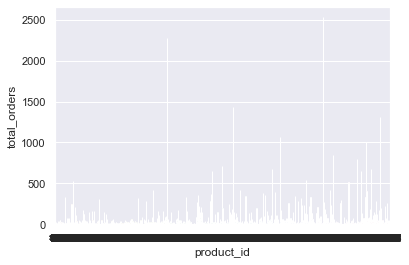

In [72]:
# total orders of different products
sns.barplot(x="product_id", y="total_orders", data=df2,capsize=.2)

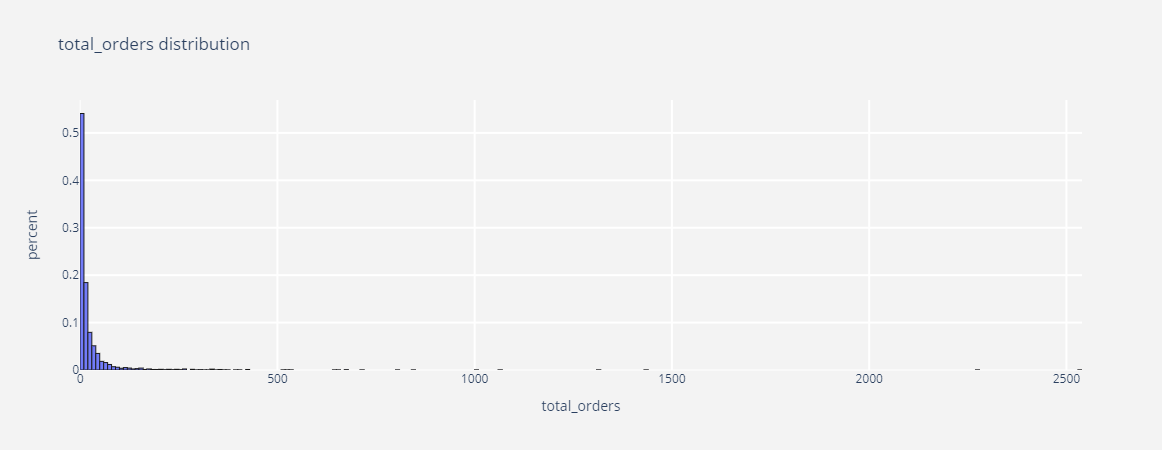

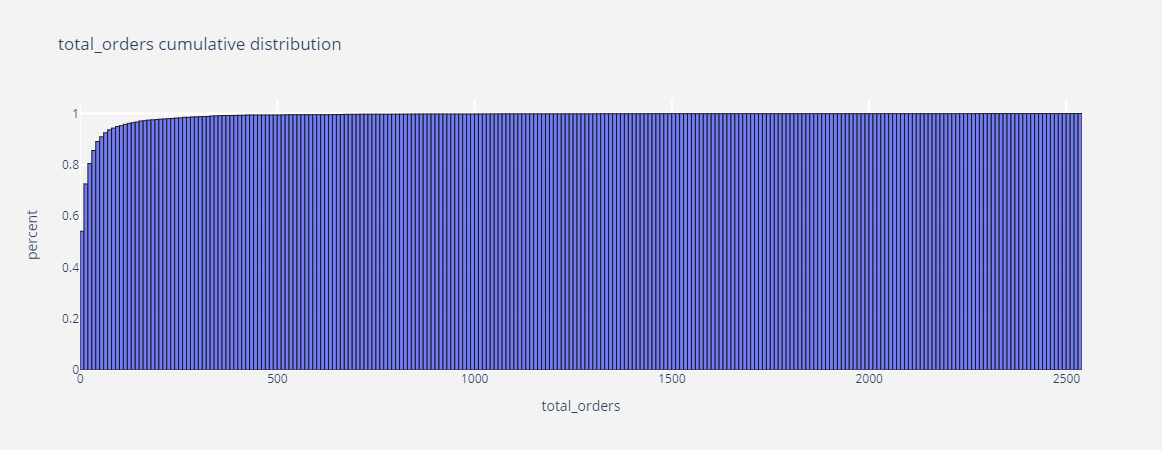

In [73]:
#plot total orders distribution
def histogram(column) :
    trace1 = go.Histogram(x  = df2[column],
                          histnorm= "probability",
#                           cumulative_enabled=True,
                          marker = dict(line = dict(width = 1,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
#     trace2 = go.Histogram(x  =page_view[column],
#                           histnorm = "percent",
#                           name = "page_view",
#                           marker = dict(line = dict(width = .5,
#                                               color = "black"
#                                              )
#                                  ),
#                           opacity = .9
#                          )
    data=[trace1]
    
#     data = [trace1,trace2] 
    layout = go.Layout(dict(title =column + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
def histogram2(column) :
    trace1 = go.Histogram(x  = df2[column],
                          histnorm= "probability",
                          cumulative_enabled=True,
                          marker = dict(line = dict(width = 1,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
#     trace2 = go.Histogram(x  =page_view[column],
#                           histnorm = "percent",
#                           name = "page_view",
#                           marker = dict(line = dict(width = .5,
#                                               color = "black"
#                                              )
#                                  ),
#                           opacity = .9
#                          )
    data=[trace1]
    
#     data = [trace1,trace2] 
    layout = go.Layout(dict(title =column + " cumulative distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
histogram('total_orders')
histogram2('total_orders')

### 4.2.2 Top products measured by conversion rate with total orders >100


### It looks like to follow exponential distribution. 54% of the product's total order is 0-9. 
### Here comes our first method, we want to choose the product with a large quantity and also a good convrsion rate.
### I choose product with total_orders >100 because it is more reliable. So the most effective products are the products with the highest conversion_rate and total orders larger than 100.

In [74]:
df3=df2[(df2.total_orders>100) ].sort_values(by='conversion_rate',ascending=False)
df3.head()

,product_id,product_name,brand_name,total_orders,total_units,total_buyers,total_sales,total_events,users,conversion_rate,RPV,b_u
133,705,e-Gift Cards,Food52 Gifts,249,304,243,29925,1655,1234,20.178282,24.250405,19.692058
1008,3246,Flip Silicone Spatula,GIR,128,149,126,3243,2361,2009,6.371329,1.614236,6.271777
885,3021,Cookbook & Tablet Stand,Yamazaki Home,159,160,158,3840,3467,3013,5.277132,1.274477,5.243943
1082,3369,Blown Glass Cake Stand Dome,Mosser Glass,160,182,150,9914,3986,3121,5.126562,3.176546,4.806152
1169,3533,Silicone Soap Dish (Set of 2),Yamazaki Home,101,107,101,2354,2375,2082,4.851105,1.130644,4.851105


### Interesting! It looks like our best product would be the e-gift cards! But unfortunately it is not the product we want to put in our ad campaign

In [75]:
df3c=df2[(df2.total_orders>100)&(df2.brand_name!='Food52 Gifts')].sort_values(by='conversion_rate',ascending=False)
# print(df3c.head(5)[['product_name','conversion_rate']])
df3c.head()

,product_id,product_name,brand_name,total_orders,total_units,total_buyers,total_sales,total_events,users,conversion_rate,RPV,b_u
1008,3246,Flip Silicone Spatula,GIR,128,149,126,3243,2361,2009,6.371329,1.614236,6.271777
885,3021,Cookbook & Tablet Stand,Yamazaki Home,159,160,158,3840,3467,3013,5.277132,1.274477,5.243943
1082,3369,Blown Glass Cake Stand Dome,Mosser Glass,160,182,150,9914,3986,3121,5.126562,3.176546,4.806152
1169,3533,Silicone Soap Dish (Set of 2),Yamazaki Home,101,107,101,2354,2375,2082,4.851105,1.130644,4.851105
1439,3951,Bee's Wrap Reusable Food Wraps,Bee's Wrap,126,164,123,3240,3070,2686,4.690990,1.206255,4.579300


### Here comes the winners!

In [76]:
df3c.head(5)[['product_name','brand_name','total_orders','conversion_rate']]

,product_name,brand_name,total_orders,conversion_rate
1008,Flip Silicone Spatula,GIR,128,6.371329
885,Cookbook & Tablet Stand,Yamazaki Home,159,5.277132
1082,Blown Glass Cake Stand Dome,Mosser Glass,160,5.126562
1169,Silicone Soap Dish (Set of 2),Yamazaki Home,101,4.851105
1439,Bee's Wrap Reusable Food Wraps,Bee's Wrap,126,4.690990


### 4.2.3 Top products measured by RPV with total orders >100


In [77]:
df3R=df2[(df2.total_orders>100)&(df2.brand_name!='Food52 Gifts')].sort_values(by='RPV',ascending=False)
df3R.head()[['product_name','brand_name','total_orders','RPV']]

,product_name,brand_name,total_orders,RPV
1965,Food52 x Staub 2-in-1 Grill Pan & Cocotte,ZWILLING J.A. Henckels,289,4.957661
2020,Food52 x Staub Steam Griddle with Glass Lid,ZWILLING J.A. Henckels,238,3.787796
1607,Food52 x Mepal Margrethe Nested Mixing Bowls & Specialty Lids,Rosti Mepal,146,3.382720
2192,Food52 x GreenPan Nonstick Skillet (Set of 2),GreenPan,2531,3.332560
803,"Food52 x Staub Essential French Oven, 3.75QT",ZWILLING J.A. Henckels,102,3.314472


### 4.2.4 Top products measured by order numbers with conversion rate >2.9

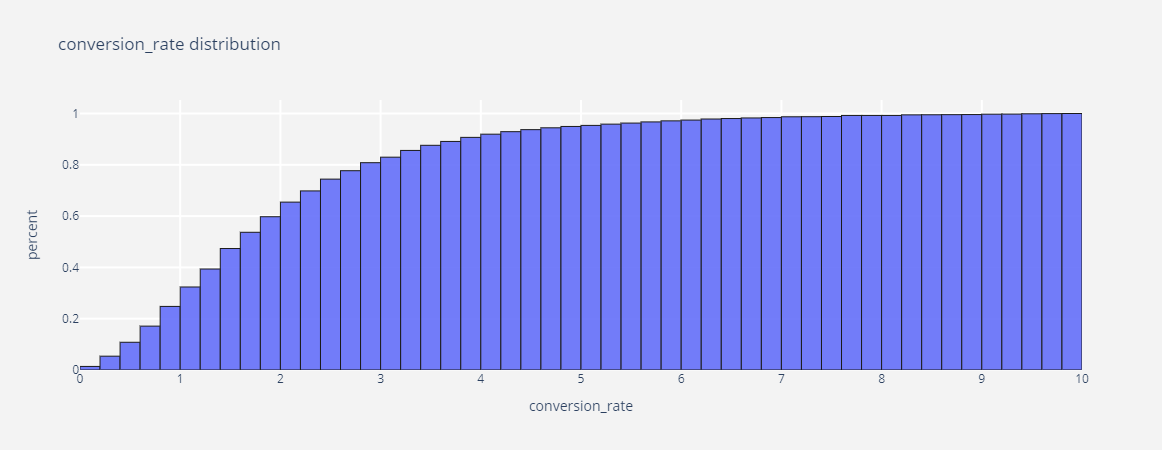

In [78]:
#thershold for conversion_rate
a=df2[(df2.conversion_rate<10)]
def histogram(column) :
    trace1 = go.Histogram(x  = a[column],
                          histnorm= "probability",
                           cumulative_enabled=True,
                          marker = dict(line = dict(width = 1,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
#     trace2 = go.Histogram(x  =page_view[column],
#                           histnorm = "percent",
#                           name = "page_view",
#                           marker = dict(line = dict(width = .5,
#                                               color = "black"
#                                              )
#                                  ),
#                           opacity = .9
#                          )
    data=[trace1]
    
#     data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

histogram('conversion_rate')

### It shows almost 80.8% of the product conversion rate are lower or equal to 2.9

### Products with the Largest orde quantity and conversion rate >2.9 

In [85]:
df3d=df2[(df2.conversion_rate>2.9)&(df2.brand_name!='Food52 Gifts')].sort_values(by='total_orders',ascending=False)
# print(df3c.head(5)[['product_name','conversion_rate']])
df3d.head()[['product_name','brand_name','total_orders','conversion_rate']]

,product_name,brand_name,total_orders,conversion_rate
2192,Food52 x GreenPan Nonstick Skillet (Set of 2),GreenPan,2531,3.092242
1460,Stackable Bodega Glasses,Bormioli Rocco,1439,3.253080
2476,GreenPan Venice Pro Nonstick Covered Sauté with Bonus Spatula,GreenPan,803,4.075935
2054,Cast Iron Spice Grinder,Frieling,538,2.920580
146,Spoon Rest,Pigeon Toe,526,4.495726


## Top brands

### 4.2.5 Top brands measured by conversion rate with total orders >200

In [80]:
df4=df2.groupby('brand_name')['total_orders','total_units','total_buyers','total_sales','total_events','users'].sum().reset_index()
df4['conversion_rate']=(df4.total_orders /df4.total_events).astype(np.float64)*100
df4['RPV']=(df4.total_sales /df4.users).astype(np.float64)
df4['b_u']=(df4.total_buyers /df4.users).astype(np.float64)*100

Best conversion rate with order >200

In [86]:
print ("Top Brands measure by conversion rate with order >200   : " )
df4c=df4[(df4.total_orders>200)&(df4.brand_name!='Food52 Gifts')].sort_values(by='conversion_rate',ascending=False)
df4c.head()[['brand_name','total_orders','conversion_rate']]

Top Brands measure by conversion rate with order >200   : 


,brand_name,total_orders,conversion_rate
33,Bee's Wrap,254,3.632723
135,GIR,852,3.010920
282,Pigeon Toe,724,2.894611
199,Lakeshore Linen,208,2.724296
66,Chef'n,1220,2.563133


### 4.2.6 Top brands measured by RPV with total orders >200


Best RPV with order >200

In [87]:
print ("Top Brands measure by RPV with order >200   : " )
df4c=df4[(df4.total_orders>200)&(df4.brand_name!='Food52 Gifts')].sort_values(by='RPV',ascending=False)
df4c.head()[['brand_name','total_orders','RPV']]

Top Brands measure by RPV with order >200   : 


,brand_name,total_orders,RPV
374,The Rope Co.,215,3.099975
147,GreenPan,4370,2.948017
100,Dutch Deluxes,210,2.687817
159,Hawkins New York,1878,2.572576
412,ZWILLING J.A. Henckels,4854,2.481456


### 4.2.7 Top brands measured by order numbers with conversion rate >2.25

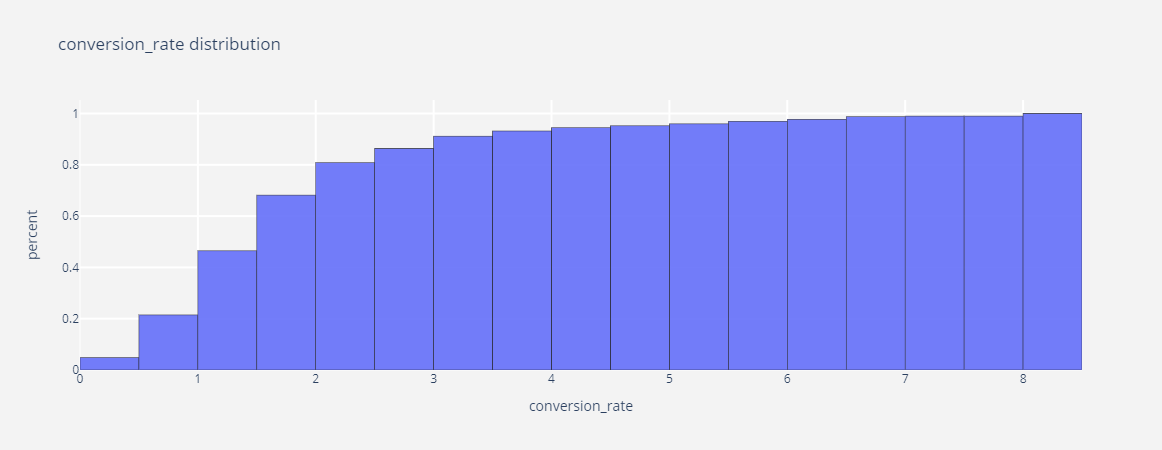

In [83]:
a=df4[(df4.conversion_rate<10)]
def histogram(column) :
    trace1 = go.Histogram(x  = a[column],
                          histnorm= "probability",
                           cumulative_enabled=True,
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
#     trace2 = go.Histogram(x  =page_view[column],
#                           histnorm = "percent",
#                           name = "page_view",
#                           marker = dict(line = dict(width = .5,
#                                               color = "black"
#                                              )
#                                  ),
#                           opacity = .9
#                          )
    data=[trace1]
    
#     data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

histogram('conversion_rate')

### From the distribution we see  80.8% of the conversion rate is lower or equal to 2.25

### Largest orde quantity with conversion rate >2.25 

In [88]:
print ("Top Brands     : " )
df4cr=df4[(df4.conversion_rate>2.25)&(df4.brand_name!='Food52 Gifts')].sort_values(by='total_orders',ascending=False)
# print(df3c.head(5)[['product_name','conversion_rate']])
df4cr.head()[['brand_name','total_orders','conversion_rate']]

Top Brands     : 


,brand_name,total_orders,conversion_rate
147,GreenPan,4370,2.335612
48,Bormioli Rocco,1593,2.512816
66,Chef'n,1220,2.563133
135,GIR,852,3.010920
282,Pigeon Toe,724,2.894611


## What other types of datasets would you want to incorporate in to improve this analysis?
- product info 
    - product ratings
- user profile
    - perform customer segmatation to create our user image (what kind of customers are we targeting)
        - Demographic data (age, generation, gender)
        - Geographic data
        - Behaviour data
- Product Category information 
    - (cook ware, kitchen, home, table) to better understand our user behaviour
- website data 
    - such as impression to get CTR to measure effectiveness

## How would you measure the success of this campaign and improve it moving forward?

1. Identify our KPI (and Stick to Them)
    - Track Origin Traffic( different channels(direct traffic, organic search traffic, paid search traffic)
    - Track conversion rate, average order value (AOV) = total sales / total orders, and other metrics like RPV and buyers/total_users

2. Keep monitoring and analyzing other metrics like website traffic,impression, CTR, CPC.

3. Perform Custom Audiences analysis(re-engaging and retargeting our customers)
    - Customer file
    - website traffic

4. A/B testing a few of your campaign components.


## How would you scale up your work to automate this process in the future?
Data integration from data resoures-ETL process-Build stable data pipeline based on the code above(analysis and extract data from database) to fit our BI dashboard for daily, weekly, nonthly monitoring and reports.